In [1]:
#Setting working path required for relative package loading

import os
os.chdir("/home/tales/ds/walmart-recruiting-store-sales-forecasting/")
print("working dir:", "\'" + os.getcwd() + "\'")

working dir: '/home/tales/ds/walmart-recruiting-store-sales-forecasting'


In [2]:
import pandas as pd

from src.data import dao
from src.utils import pretties, time_utils, stats
from src.visualization import plot
from bokeh.plotting import show, output_notebook

In [3]:
pretties.max_data_frame_columns()
pretties.decimal_notation()
output_notebook()

Loading BokehJS ...

# walmart-recruiting-store-sales-forecasting
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

# Train

### train.csv

<p>This is the historical training data, which covers from <b>2010-02-05</b> to <b>2012-11-01</b>. <br> Within this file you will find the following fields:</p>

<ul>
<li>Store - the store number</li>
<li>Dept - the department number</li>
<li>Date - the week</li>
<li>Weekly_Sales - &nbsp;sales for the given department in the given store</li>
<li>IsHoliday - whether the week is a special holiday week</li>
</ul>

This file contains anonymized information about the 45 stores, indicating the type and size of store.

### Loading

In [4]:
train = dao.load_dataset("train")

In [5]:
print("Total train size: {}".format(len(train)))

Total train size: 421570


In [6]:
train.sample(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,timestamp,store_dept
413395,45,11,2010-09-17,9741.14,False,1284692400.00,45_11
359733,38,87,2011-10-07,854.92,False,1317956400.00,38_87
118277,13,5,2011-12-30,73961.94,True,1325214000.00,13_5
258712,27,14,2011-12-23,77035.86,False,1324609200.00,27_14
5988,1,46,2011-09-16,17763.55,False,1316142000.00,1_46
225068,23,81,2012-06-22,8663.25,False,1340334000.00,23_81
111742,12,29,2010-04-09,5707.00,False,1270782000.00,12_29
116106,12,83,2011-02-11,224.90,True,1297393200.00,12_83
273104,28,49,2011-04-08,16645.97,False,1302231600.00,28_49
328022,34,71,2010-06-25,2202.20,False,1277434800.00,34_71


In [7]:
train.head(3).append(train.tail(3))

,Store,Dept,Date,Weekly_Sales,IsHoliday,timestamp,store_dept
0,1,1,2010-02-05,24924.50,False,1265338800.00,1_1
277665,29,5,2010-02-05,15552.08,False,1265338800.00,29_5
277808,29,6,2010-02-05,3200.22,False,1265338800.00,29_6
181313,19,31,2012-10-26,3128.17,False,1351220400.00,19_31
181599,19,33,2012-10-26,5740.14,False,1351220400.00,19_33
421569,45,98,2012-10-26,1076.80,False,1351220400.00,45_98


# <font color="navy">Overview</font>

#### Weekly Sales

In [8]:
train["Weekly_Sales"].describe()

count   421570.00
mean     15981.26
std      22711.18
min      -4988.94
25%       2079.65
50%       7612.03
75%      20205.85
max     693099.36
Name: Weekly_Sales, dtype: float64

<b>Negative Sales</b> <br>
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/discussion/7152

In [9]:
stats.freq(train["Weekly_Sales"] < 0)

,freq_absolute,freq_relative
False,420285,99.70%
True,1285,0.30%


<b>Zero Sales</b>

In [10]:
stats.freq(train["Weekly_Sales"] == 0)

,freq_absolute,freq_relative
False,421497,99.98%
True,73,0.02%


<b>No Outliers</b>

In [11]:
train["Weekly_Sales"].plot.hist(title="Weekly Sales Overview", figsize=(6,3))

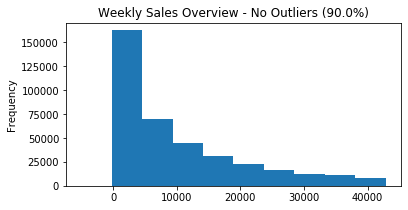

In [12]:
outliers_thresh_quantile = 0.90
no_outliers = train[train["Weekly_Sales"] <= train["Weekly_Sales"].quantile(outliers_thresh_quantile)]
no_outliers["Weekly_Sales"].plot.hist(title="Weekly Sales Overview - No Outliers ({}%)".format(100 * outliers_thresh_quantile), figsize=(6,3))

# <font color="navy">Stores</font>

In [13]:
"{} stores".format(len(train["Store"].drop_duplicates()))

'45 stores'

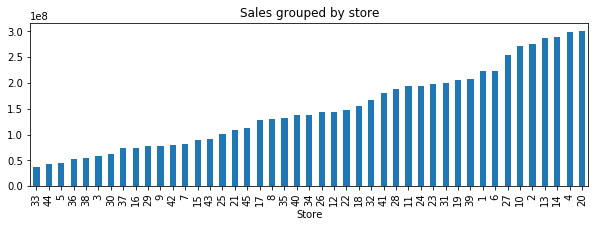

In [14]:
train.groupby("Store")["Weekly_Sales"].sum().sort_values().plot.bar(title="Sales grouped by store", figsize=(10,3))

# <font color="navy">Dates</font>

In [15]:
date_diff = time_utils.time_resolution(train)

In [16]:
print("time between dates")
date_diff.value_counts()

time between dates


7 days    141
Name: Date, dtype: int64

In [17]:
grouped_sales = train.groupby("Date")["Weekly_Sales"].sum()
p = plot.plot_time_series_count(grouped_sales.index, grouped_sales, color="navy", title="Sales vs Datetime")
show(p)

/home/tales/anaconda3/lib/python3.7/site-packages/bokeh/plotting/helpers.py:628: UserWarning: WheelZoomTool are being repeated
  warnings.warn("%s are being repeated" % ",".join(repeated_tools))


<b>Questions</b> <br>
Does each the stores follow the same sales variance behavior of all together? <br>
Can departments be grouped by sales seasonality similarity?

# <font color="navy">Holidays</font>

In [18]:
display("Store Dates With Holidays")
stats.freq(train.drop_duplicates(["Store", "Date"])["IsHoliday"])

'Store Dates With Holidays'

,freq_absolute,freq_relative
False,5985,93.01%
True,450,6.99%


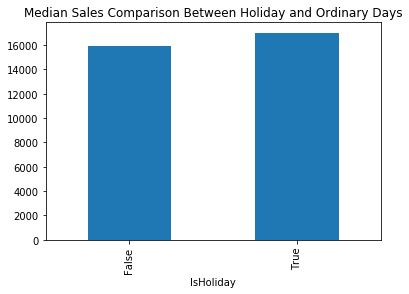

In [19]:
grouped_sales = train.groupby("IsHoliday")["Weekly_Sales"].mean()
grouped_sales.plot.bar(title="Median Sales Comparison Between Holiday and Ordinary Days")

<b>Notes</b> <br>
It seems that not all the holidays have a huge effect in increasing sales, among all stores and all departments

# <font color="navy">Departments</font>

In [20]:
"{} department labels".format(len(train["Dept"].drop_duplicates()))

'81 department labels'

In [21]:
"{} departments".format(len(train["store_dept"].drop_duplicates()))

'3331 departments'

In [22]:
store_dept_amount_dates = train.groupby("Date")["store_dept"].apply(len).reset_index()
store_dept_amount_dates["Date"] = store_dept_amount_dates["Date"].apply(pd.to_datetime)

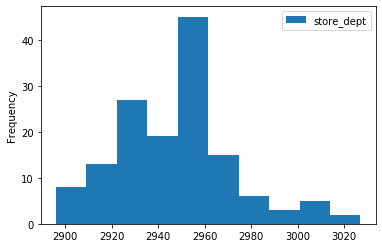

In [23]:
store_dept_amount_dates.sort_values("Date").set_index("Date").plot.hist(bins=10)

<b>Questions</b> <br>
Can we assume that the same Dept number corresponds the same department accross all stores?
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/discussion/7159
(hypothesis testing) <br>
Can we group Store Departments by it Weekly Sales behavior?

In [24]:
store_dept_time_diff = train.groupby("store_dept").apply(lambda store_dept_data : time_utils.time_resolution(store_dept_data).value_counts())

In [25]:
# help(pd.to_datetime("2020-05-21") - pd.to_datetime("2020-06-21"))

In [26]:
store_dept_time_diff.head(50)

store_dept          
10_1        7 days      141
10_10       7 days      141
10_11       7 days      141
10_12       7 days      141
10_13       7 days      141
10_14       7 days      141
10_16       7 days      141
10_17       7 days      141
10_18       7 days       96
            49 days       2
            21 days       2
            119 days      1
            42 days       1
            14 days       1
10_19       7 days      141
10_2        7 days      141
10_20       7 days      141
10_21       7 days      141
10_22       7 days      141
10_23       7 days      141
10_24       7 days      141
10_25       7 days      141
10_26       7 days      141
10_27       7 days      141
10_28       7 days      141
10_29       7 days      141
10_3        7 days      141
10_30       7 days      141
10_31       7 days      141
10_32       7 days      141
10_33       7 days      141
10_34       7 days      141
10_35       7 days      141
10_36       7 days      141
10_37       7 days      141

# Test

### test.csv

In [27]:
test = dao.load_dataset("test")

In [28]:
test.head(3).append(test.tail(3))

,Store,Dept,Date,IsHoliday,timestamp,store_dept
0,1,1,2012-11-02,False,1351825200.00,1_1
48640,19,10,2012-11-02,False,1351825200.00,19_10
42002,16,55,2012-11-02,False,1351825200.00,16_55
61235,23,79,2013-07-26,False,1374807600.00,23_79
62308,24,13,2013-07-26,False,1374807600.00,24_13
115063,45,98,2013-07-26,False,1374807600.00,45_98


In [29]:
len(train["Store"].drop_duplicates())

45

In [30]:
len(train["store_dept"].drop_duplicates())

3331

In [31]:
test.head(2).append(test.tail(2))

,Store,Dept,Date,IsHoliday,timestamp,store_dept
0,1,1,2012-11-02,False,1351825200.00,1_1
48640,19,10,2012-11-02,False,1351825200.00,19_10
62308,24,13,2013-07-26,False,1374807600.00,24_13
115063,45,98,2013-07-26,False,1374807600.00,45_98
